In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as datetime
import operator
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("covid_19_india.csv")
df.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0


In [3]:
df.shape

(419, 7)

In [4]:
df.rename({"State/UnionTerritory":"State"},axis=1,inplace=True)
df.head()

,Sno,Date,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0


In [5]:
df.iloc[:,1:]

,Date,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30/01/20,Kerala,1,0,0,0
1,31/01/20,Kerala,1,0,0,0
2,01/02/20,Kerala,2,0,0,0
3,02/02/20,Kerala,3,0,0,0
4,03/02/20,Kerala,3,0,0,0
...,...,...,...,...,...,...
414,27/03/20,Tamil Nadu,23,6,1,1
415,27/03/20,Telengana,35,10,1,0
416,27/03/20,Uttarakhand,4,1,0,0
417,27/03/20,Uttar Pradesh,40,1,11,0


In [6]:
df.State.value_counts()

Kerala                         58
Telengana                      26
Delhi                          26
Rajasthan                      25
Haryana                        24
Uttar Pradesh                  24
Ladakh                         21
Tamil Nadu                     21
Punjab                         19
Jammu and Kashmir              19
Karnataka                      19
Maharashtra                    19
Andhra Pradesh                 16
Uttarakhand                    13
Odisha                         12
West Bengal                    10
Chandigarh                      9
Puducherry                      8
Chhattisgarh                    8
Gujarat                         8
Madhya Pradesh                  7
Himachal Pradesh                7
Bihar                           6
Manipur                         4
Mizoram                         3
Andaman and Nicobar Islands     2
Goa                             2
Pondicherry                     2
Chattisgarh                     1
Name: State, d

In [7]:
df_confirm=pd.DataFrame(index=list(df["Date"]),columns=list(df["State"])).T
df_confirm.head(2)

,30/01/20,31/01/20,01/02/20,02/02/20,03/02/20,04/02/20,05/02/20,06/02/20,07/02/20,08/02/20,...,27/03/20,27/03/20,27/03/20,27/03/20,27/03/20,27/03/20,27/03/20,27/03/20,27/03/20,27/03/20
Kerala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kerala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df["TotalConfirm_cases"]=df["ConfirmedIndianNational"]+df["ConfirmedForeignNational"]

In [9]:
df.head(4)

,Sno,Date,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,TotalConfirm_cases
0,1,30/01/20,Kerala,1,0,0,0,1
1,2,31/01/20,Kerala,1,0,0,0,1
2,3,01/02/20,Kerala,2,0,0,0,2
3,4,02/02/20,Kerala,3,0,0,0,3


In [10]:
confirm=list(df["TotalConfirm_cases"])
for k,v in zip([i for i in range(0, len(list(df_confirm.keys()))+1)], confirm):
    df_confirm.iloc[k,k]=v
df_confirm.head()

,30/01/20,31/01/20,01/02/20,02/02/20,03/02/20,04/02/20,05/02/20,06/02/20,07/02/20,08/02/20,...,27/03/20,27/03/20,27/03/20,27/03/20,27/03/20,27/03/20,27/03/20,27/03/20,27/03/20,27/03/20
Kerala,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kerala,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kerala,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kerala,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kerala,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_confirm.fillna(value=0,inplace=True)

In [12]:
df_confirm.head()

,30/01/20,31/01/20,01/02/20,02/02/20,03/02/20,04/02/20,05/02/20,06/02/20,07/02/20,08/02/20,...,27/03/20,27/03/20,27/03/20,27/03/20,27/03/20,27/03/20,27/03/20,27/03/20,27/03/20,27/03/20
Kerala,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_confirm=df_confirm.groupby(axis=1,level=0).sum()
df_confirm.head()

,01/02/20,01/03/20,02/02/20,02/03/20,03/02/20,03/03/20,04/02/20,04/03/20,05/02/20,05/03/20,...,25/02/20,25/03/20,26/02/20,26/03/20,27/02/20,27/03/20,28/02/20,29/02/20,30/01/20,31/01/20
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Kerala,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_confirm['27/03/20'].sum()

724

#### Data Frame of Death

In [15]:
df_death = pd.DataFrame(index=list(df['Date']) ,columns=list(df['State'])).T
# Death details entry to the empty dataframe
death = list(df['Deaths'])
for k,v in zip([i for i in range(0, len(list(df_death.keys()))+1)], death):
    df_death.iloc[k,k] = v
# fill the NaN value as 0
df_death.fillna(0, inplace=True)
# df_death.head()
# Combine all the similar dataes:
df_death = df_death.groupby(axis=1, level=0).sum()
df_death.head()

,01/02/20,01/03/20,02/02/20,02/03/20,03/02/20,03/03/20,04/02/20,04/03/20,05/02/20,05/03/20,...,25/02/20,25/03/20,26/02/20,26/03/20,27/02/20,27/03/20,28/02/20,29/02/20,30/01/20,31/01/20
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Data Frame For Cured

In [16]:
# create new data frame df_cured
df_cured = pd.DataFrame(index=list(df['Date']) ,columns=list(df['State'])).T

# cured details entry to the empty dataframe
cured = list(df['Cured'])
for k,v in zip([i for i in range(0, len(list(df_cured.keys()))+1)], cured):
    df_cured.iloc[k][k] = v

df_cured.fillna(0, inplace=True)

# Combine all the similar dataes:
df_cured = df_cured.groupby(axis=1, level=0).sum()
df_cured.head()

,01/02/20,01/03/20,02/02/20,02/03/20,03/02/20,03/03/20,04/02/20,04/03/20,05/02/20,05/03/20,...,25/02/20,25/03/20,26/02/20,26/03/20,27/02/20,27/03/20,28/02/20,29/02/20,30/01/20,31/01/20
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kerala,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
dates = list(df['Date'].unique())
india_confirm_cases = []
india_death_cases = []
india_mortality_rate = []
india_recovery_rate = []
total_recovered = []
total_active = []
for i in dates:
    confirm_sum = df_confirm[i].sum()
    death_sum = df_death[i].sum()
    recovery_sum = df_cured[i].sum()
    india_confirm_cases.append(confirm_sum)
    india_death_cases.append(death_sum)
    india_mortality_rate.append(death_sum / confirm_sum)
    india_recovery_rate.append(recovery_sum / confirm_sum)
    total_recovered.append(recovery_sum)
    total_active.append(confirm_sum - death_sum - recovery_sum)

#### State Wise Analysis

In [18]:
df = pd.read_csv('covid_19_india.csv')
# Create another sate dataframe for state wise analysis
state_confirm_df = df_confirm.copy()
state_death_df = df_death.copy()
state_recovery_df = df_cured.copy()


In [19]:
# Combine sate rows in a single row
state_confirm_df = state_confirm_df.groupby(axis=0, level=0).sum()
state_death_df = state_death_df.groupby(axis=0, level=0).sum()
state_recovery_df = state_recovery_df.groupby(axis=0, level=0).sum()
states = sorted(list(state_confirm_df.index))

In [20]:
state_confirm_df.head(4)

,01/02/20,01/03/20,02/02/20,02/03/20,03/02/20,03/03/20,04/02/20,04/03/20,05/02/20,05/03/20,...,25/02/20,25/03/20,26/02/20,26/03/20,27/02/20,27/03/20,28/02/20,29/02/20,30/01/20,31/01/20
Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
Andhra Pradesh,0,0,0,0,0,0,0,0,0,0,...,0,9,0,11,0,12,0,0,0,0
Bihar,0,0,0,0,0,0,0,0,0,0,...,0,4,0,6,0,6,0,0,0,0
Chandigarh,0,0,0,0,0,0,0,0,0,0,...,0,7,0,7,0,7,0,0,0,0


In [21]:
len(states)

29

In [22]:
state_confirm = []
state_death = []
state_recovery = []
for i in states:
    a = state_confirm_df.loc[i][list(df['Date'])[-1]]
    b = state_death_df.loc[i][list(df['Date'])[-1]]
    c = state_recovery_df.loc[i][list(df['Date'])[-1]]
    state_confirm.append(a)
    state_death.append(b)
    state_recovery.append(c)

In [23]:
import operator

In [24]:
state_confirm_dict = dict(sorted(dict(zip(states, state_confirm)).items(), key=operator.itemgetter(1), reverse=True))

In [25]:
l=dict(zip(states, state_confirm)).items()
type(l)

dict_items

In [26]:
print(l)

dict_items([('Andaman and Nicobar Islands', 1), ('Andhra Pradesh', 12), ('Bihar', 6), ('Chandigarh', 7), ('Chattisgarh', 0), ('Chhattisgarh', 6), ('Delhi', 36), ('Goa', 3), ('Gujarat', 43), ('Haryana', 30), ('Himachal Pradesh', 3), ('Jammu and Kashmir', 13), ('Karnataka', 55), ('Kerala', 137), ('Ladakh', 13), ('Madhya Pradesh', 20), ('Maharashtra', 130), ('Manipur', 1), ('Mizoram', 1), ('Odisha', 2), ('Pondicherry', 0), ('Puducherry', 1), ('Punjab', 33), ('Rajasthan', 41), ('Tamil Nadu', 29), ('Telengana', 45), ('Uttar Pradesh', 41), ('Uttarakhand', 5), ('West Bengal', 10)])


In [27]:
dict(sorted(dict(zip(states, state_confirm)).items(), key=operator.itemgetter(1), reverse=True))

{'Kerala': 137,
 'Maharashtra': 130,
 'Karnataka': 55,
 'Telengana': 45,
 'Gujarat': 43,
 'Rajasthan': 41,
 'Uttar Pradesh': 41,
 'Delhi': 36,
 'Punjab': 33,
 'Haryana': 30,
 'Tamil Nadu': 29,
 'Madhya Pradesh': 20,
 'Jammu and Kashmir': 13,
 'Ladakh': 13,
 'Andhra Pradesh': 12,
 'West Bengal': 10,
 'Chandigarh': 7,
 'Bihar': 6,
 'Chhattisgarh': 6,
 'Uttarakhand': 5,
 'Goa': 3,
 'Himachal Pradesh': 3,
 'Odisha': 2,
 'Andaman and Nicobar Islands': 1,
 'Manipur': 1,
 'Mizoram': 1,
 'Puducherry': 1,
 'Chattisgarh': 0,
 'Pondicherry': 0}

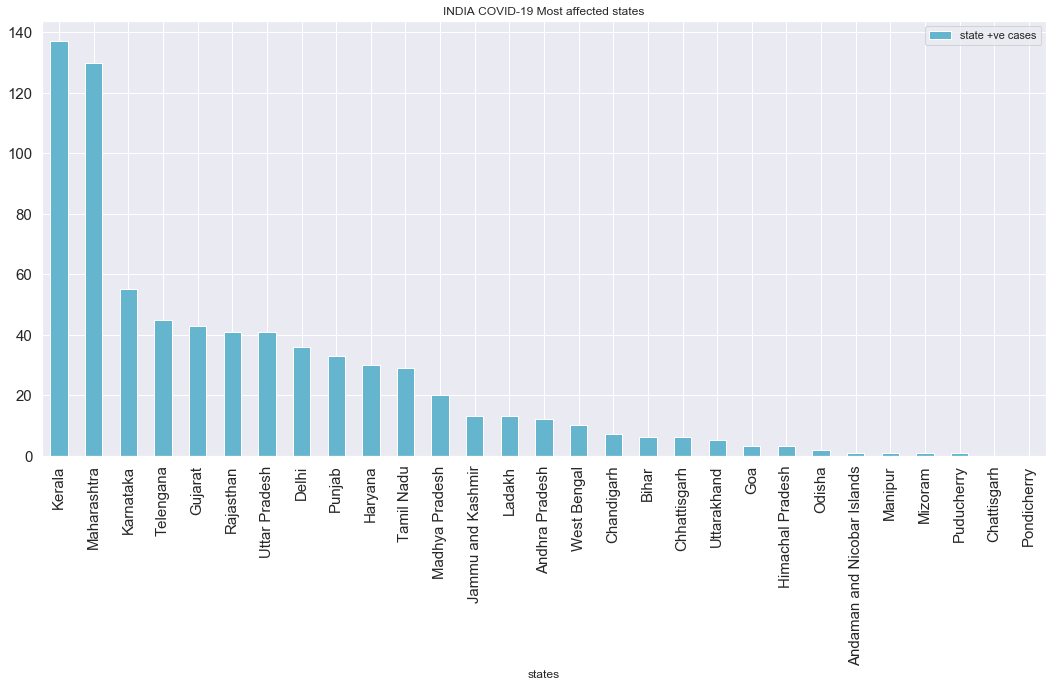

In [28]:
import operator
import seaborn as sns
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (18,8)
bar_df = pd.DataFrame({'states':list(state_confirm_dict.keys())[0:],'state +ve cases':list(state_confirm_dict.values())[0:]})
bar_df.plot.bar(x='states', y='state +ve cases', rot=90, color='c', title='INDIA COVID-19 Most affected states', fontsize=15)

#### Future Prediction: Support Vector Regression (SVR)

In [29]:
dates = list(df['Date'].unique())
print("length of dates:",len(dates))

length of dates: 58


In [30]:
days_in_future=15
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-2,1)
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72]])

In [31]:
future_forecast.shape

(73, 1)

In [32]:
adjusted_dates=future_forecast[:-15]

In [33]:
print("Adjusted_Dates:\n",adjusted_dates)

Adjusted_Dates:
 [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]]


In [34]:
len(adjusted_dates)

58

In [35]:
len(future_forecast)

73

In [36]:
len(dates)

58

In [37]:
print("Length of Days Selected For Future_forecasting: %d days " % (len(future_forecast)-len(dates)))

Length of Days Selected For Future_forecasting: 15 days 


In [38]:
start='30/01/2020'
start_date=datetime.datetime.strptime(start,"%d/%m/%Y")
future_forecast_dates=[]
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime("%d/%m/%Y"))

In [39]:
(start_date + datetime.timedelta(days=15)).strftime("%d/%m/%Y")

'14/02/2020'

In [54]:
future_forecast_dates

['30/01/2020',
 '31/01/2020',
 '01/02/2020',
 '02/02/2020',
 '03/02/2020',
 '04/02/2020',
 '05/02/2020',
 '06/02/2020',
 '07/02/2020',
 '08/02/2020',
 '09/02/2020',
 '10/02/2020',
 '11/02/2020',
 '12/02/2020',
 '13/02/2020',
 '14/02/2020',
 '15/02/2020',
 '16/02/2020',
 '17/02/2020',
 '18/02/2020',
 '19/02/2020',
 '20/02/2020',
 '21/02/2020',
 '22/02/2020',
 '23/02/2020',
 '24/02/2020',
 '25/02/2020',
 '26/02/2020',
 '27/02/2020',
 '28/02/2020',
 '29/02/2020',
 '01/03/2020',
 '02/03/2020',
 '03/03/2020',
 '04/03/2020',
 '05/03/2020',
 '06/03/2020',
 '07/03/2020',
 '08/03/2020',
 '09/03/2020',
 '10/03/2020',
 '11/03/2020',
 '12/03/2020',
 '13/03/2020',
 '14/03/2020',
 '15/03/2020',
 '16/03/2020',
 '17/03/2020',
 '18/03/2020',
 '19/03/2020',
 '20/03/2020',
 '21/03/2020',
 '22/03/2020',
 '23/03/2020',
 '24/03/2020',
 '25/03/2020',
 '26/03/2020',
 '27/03/2020',
 '28/03/2020',
 '29/03/2020',
 '30/03/2020',
 '31/03/2020',
 '01/04/2020',
 '02/04/2020',
 '03/04/2020',
 '04/04/2020',
 '05/04/20

In [41]:
day_since_30_1 = np.array([i for i in range(len(dates))]).reshape(-1, 1)


In [42]:
from sklearn.model_selection import train_test_split
x_train_confirm, x_test_confirm, y_train_confirm, y_test_confirm = train_test_split(day_since_30_1, india_confirm_cases,
test_size=0.3, shuffle=False)

In [43]:
svm_model = SVR(shrinking=True, kernel='poly', gamma=0.01, epsilon=1, degree=7, C=0.1)
svm_model.fit(x_train_confirm, y_train_confirm)
svm_test_pred = svm_model.predict(x_test_confirm)
print('MSE:', mean_squared_error(svm_test_pred, y_test_confirm))
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirm))
print('R^2:', r2_score(svm_test_pred, y_test_confirm))

MSE: 2813.8710772879062
MAE: 40.02195651114484
R^2: 0.9106600442444914


In [44]:
future_svm_pred = svm_model.predict(future_forecast)

In [45]:
print(list(future_svm_pred))

[1.9993230173960606, 1.9993230177240073, 1.9993230593732418, 1.999323734615558, 1.9993283904752774, 1.999348638234299, 1.9994148214917318, 1.9995930956294878, 2.000010771535822, 2.0008915764372355, 2.0026024846905934, 2.005713771395373, 2.011073941641977, 2.0199011883252447, 2.033893031274753, 2.055355790641594, 2.087355547285521, 2.1338922431997767, 2.2000985746664505, 2.292465330868405, 2.419094831096269, 2.5899841141901256, 2.8173395293080525, 3.115924387380043, 3.503441320873359, 4.000951005461653, 4.633328896331628, 5.429761640228358, 6.424284793868688, 7.65636353726874, 9.171517992824343, 11.02199483752626, 13.267486843246994, 15.975902009256211, 19.224183920271724, 23.099185005262523, 27.69859434800598, 33.13192165406796, 39.52153914185616, 47.003782836221184, 55.73011517102274, 65.86835018122945, 77.6039434070364, 91.14134759406004, 106.70543654213104, 124.54299806753549, 144.92429837534578, 168.14471851984413, 194.52646586249026, 224.4203616301194, 258.207705489792, 296.302219

In [46]:
last_dates = future_forecast_dates[-15:-2]
print(last_dates)

['28/03/2020', '29/03/2020', '30/03/2020', '31/03/2020', '01/04/2020', '02/04/2020', '03/04/2020', '04/04/2020', '05/04/2020', '06/04/2020', '07/04/2020', '08/04/2020', '09/04/2020']


In [47]:
last_pred=list(future_svm_pred)[-15:-2]
last_pred_list=[int(round(i)) for i in last_pred]
print("Future Predicted Confirmed Cases Of COVID 19 in INDIA")
print()
for i,j in zip(last_dates,last_pred_list):
    print(i,":",j)

print("\n                      PREDICTED BY PRAVEEN BHARGAV")


Future Predicted Confirmed Cases Of COVID 19 in INDIA

28/03/2020 : 726
29/03/2020 : 818
30/03/2020 : 920
31/03/2020 : 1033
01/04/2020 : 1157
02/04/2020 : 1294
03/04/2020 : 1444
04/04/2020 : 1610
05/04/2020 : 1791
06/04/2020 : 1990
07/04/2020 : 2207
08/04/2020 : 2444
09/04/2020 : 2703

                      PREDICTED BY PRAVEEN BHARGAV


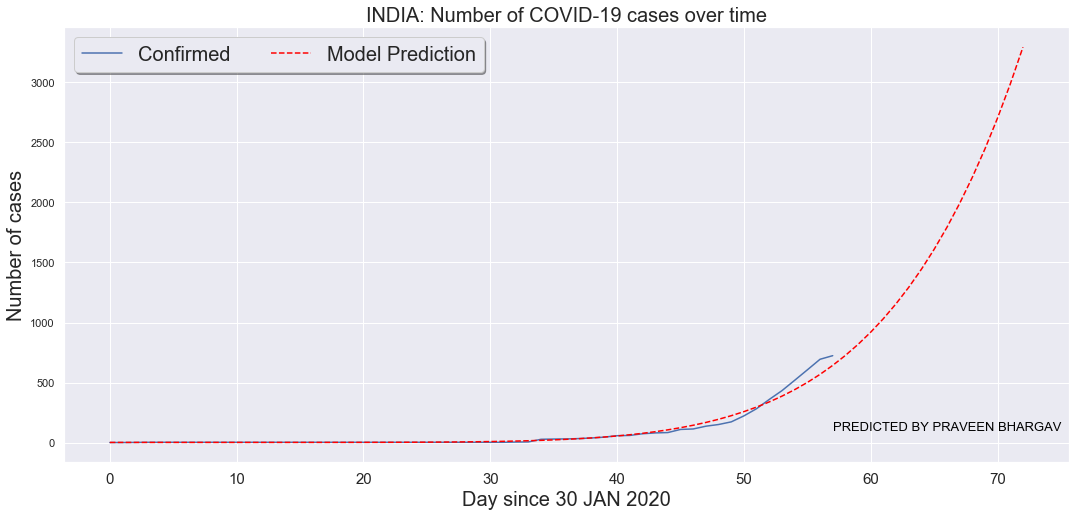

In [48]:
plt.figure(figsize=(18,8))
plt.plot(adjusted_dates, india_confirm_cases)
plt.plot(future_forecast, future_svm_pred, linestyle='dashed', color='red')
plt.title('INDIA: Number of COVID-19 cases over time', size=20)
plt.xlabel('Day since 30 JAN 2020', size=20)
plt.ylabel('Number of cases', size=20)
plt.legend(['Confirmed', 'Model Prediction'],fontsize=20, fancybox=True, ncol=10, shadow=True)
plt.text(57, 100, "PREDICTED BY PRAVEEN BHARGAV",fontsize=13,color='Black')
plt.xticks(size=15)
plt.savefig("Model Prediction Curve.png")
plt.show()

#### INDIA COVID19 FUTURE PREDICTION DATE WISE

In [49]:
temp_dict=dict(zip(last_dates,last_pred_list))

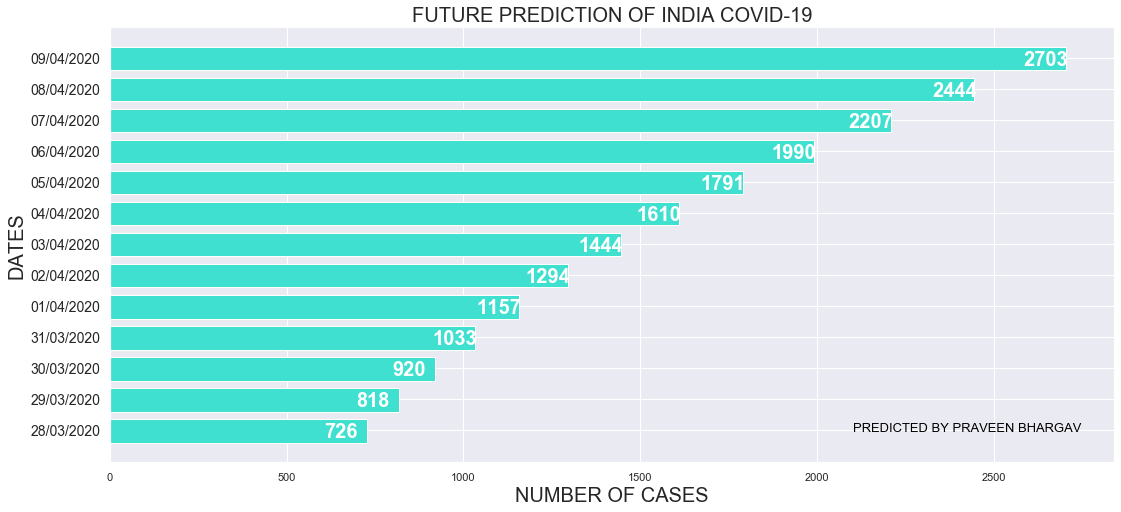

In [50]:
x = list(temp_dict.keys())
y = list(temp_dict.values())
fig, ax = plt.subplots()
width = 0.75 # the width of the bars
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color="#40E0D0")
ax.set_yticks(ind+width/30)
ax.set_yticklabels(x, minor=False, fontsize=14)
plt.title('FUTURE PREDICTION OF INDIA COVID-19', fontsize=20)
plt.xlabel('NUMBER OF CASES', fontsize=20)
plt.ylabel('DATES', fontsize=20)
for i, v in enumerate(y):
    ax.text(v + -120, i + -0.2, str(v), color='w', fontweight='bold', fontsize=20)
plt.text(2100,0, "PREDICTED BY PRAVEEN BHARGAV",fontsize=13,color='Black')

plt.savefig("Future Prediction of India covid19.png")
plt.show()

#### INDIA COVID 19 FUTRUE PREDICTION WEEKLY

In [51]:
future_forecast_dates
future_prediction = [int(round(future_svm_pred[i])) for i in range(len(future_svm_pred))]

In [52]:
weeks = future_forecast_dates[0::7][-5:]
weeks_report = future_prediction[0::7][-5:]

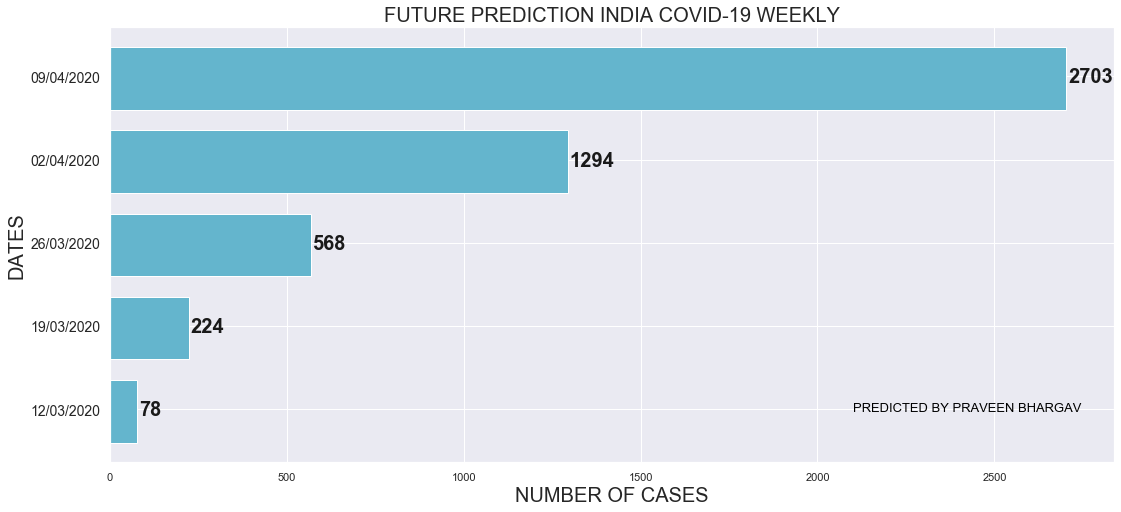

In [53]:
x = weeks
y = weeks_report
fig, ax = plt.subplots()
width = 0.75 # the width of the bars
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color="c")
ax.set_yticks(ind+width/30)
ax.set_yticklabels(x, minor=False, fontsize=14)
plt.title('FUTURE PREDICTION INDIA COVID-19 WEEKLY', fontsize=20)
plt.xlabel('NUMBER OF CASES', fontsize=20)
plt.ylabel('DATES', fontsize=20)
for i, v in enumerate(y):
    ax.text(v + 5, i + -0.05, str(v), color='k', fontweight='bold', fontsize=20)
plt.savefig("Future Prediction of India covid19 weekly.png")
plt.text(2100,0, "PREDICTED BY PRAVEEN BHARGAV",fontsize=13,color='Black')
plt.show()